In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import os, sys
from collections import Counter


Bad key "text.kerning_factor" on line 4 in
c:\users\imadeddine\anaconda3\envs\research\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error
from verstack.stratified_continuous_split import scsplit 

In [6]:
path = os.getcwd()

In [7]:
path_data_train = path + "\\covidChallenge\\data\\train.csv"
path_data_train

'C:\\Users\\Imadeddine\\Desktop\\UPMC\\PhDTrack\\ML X-INF554\\DataChallenge\\covidChallenge\\data\\train.csv'

In [8]:
train = pd.read_csv(path_data_train)

In [60]:
train.columns

Index(['id', 'timestamp', 'retweet_count', 'user_verified',
       'user_statuses_count', 'user_followers_count', 'user_friends_count',
       'user_mentions', 'urls', 'hashtags', 'text'],
      dtype='object')

In [26]:
counted_retweets = Counter(train["retweet_count"])

In [27]:
counted_retweets

Counter({0: 422803,
         2: 25737,
         1: 57111,
         5: 9037,
         26: 1054,
         12: 2961,
         3: 16338,
         28: 997,
         281: 50,
         9: 4380,
         27: 969,
         6: 7154,
         4: 11695,
         16: 2023,
         13: 2596,
         25: 1068,
         246: 45,
         399: 25,
         514: 11,
         6735: 2,
         1887: 6,
         68: 308,
         1282: 4,
         9694: 1,
         17: 1856,
         129: 137,
         60: 330,
         87: 206,
         35: 698,
         890: 7,
         86: 221,
         14: 2419,
         3464: 4,
         109: 169,
         7: 6016,
         235: 64,
         513: 22,
         704: 18,
         61: 371,
         258: 63,
         6044: 2,
         17246: 1,
         31: 868,
         123: 139,
         176: 86,
         8: 5078,
         1362: 5,
         366: 40,
         49: 460,
         667: 10,
         21: 1440,
         101: 185,
         22: 1405,
         11: 3306,
        

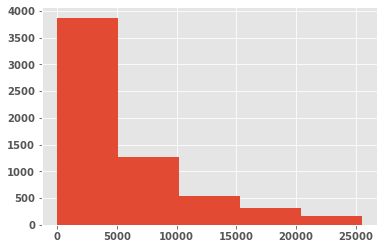

In [46]:
plt.style.use('ggplot')
plt.hist(counted_retweets, bins = [0, 5100, 10200, 15300, 20400, 25500])
plt.show()

In [37]:
nbr_of_oberservations = len(counted_retweets)
minimum, maximum = min(counted_retweets.values()), max(counted_retweets.values())

In [40]:
import math
intervals = math.sqrt(nbr_of_oberservations)
width = (maximum - minimum) // intervals

In [41]:
print(width)

5100.0


In [58]:
import itertools

def onlyTweets(inputTweets, nbr):
    sorted_tweets = dict(sorted(inputTweets.items(), key=lambda item: item[0]))
    return dict(itertools.islice(sorted_tweets.items(), nbr))

In [59]:
onlyTweets(sorted_tweets, 10)

{0: 422803,
 1: 57111,
 2: 25737,
 3: 16338,
 4: 11695,
 5: 9037,
 6: 7154,
 7: 6016,
 8: 5078,
 9: 4380}

In [69]:
sorted_csv = train.sort_values(by=["retweet_count"], ascending=False)

In [71]:
sorted_csv.drop('timestamp', axis=1, inplace=True)

In [75]:
sorted_csv[20:30]

,id,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
408817,408817,185406,False,86803,1238,99,NaN,NaN,NaN,when the coronavirus tweets are funny but ur s...
470317,470317,178111,False,876,5361,4292,NaN,NaN,NaN,My dog after I sent him to get supplies since ...
535135,535135,168249,True,142957,138422,11082,NaN,NaN,NaN,In retrospect Sandy Hook marked the end of the...
469058,469058,166665,True,15794,117029367,606826,NaN,twitter.com/i/web/status/1…,NaN,If you’re wondering whether it’s an overreacti...
210249,210249,163910,False,21633,18035,2849,NaN,NaN,NaN,This poor man is going to die tryna save Ameri...
277334,277334,160631,False,14078,357,225,NaN,NaN,NaN,The coronavirus canceling my plans
224651,224651,160229,False,23928,711,201,NaN,NaN,NaN,Me sending my dog out for supplies since he ca...
471393,471393,159168,False,37875,48801,35254,NaN,twitter.com/i/web/status/1…,NaN,900 people get Coronavirus and the whole world...
340499,340499,156817,True,25238,118691,1860,NaN,twitter.com/i/web/status/1…,NaN,So society’s *real* key workers have just bee...
327965,327965,155376,True,15802,39492,228,NaN,twitter.com/i/web/status/1…,NaN,I see a lot of people being like “I would surv...


In [82]:
counter_user_mentions = sorted_csv['user_mentions'].isnull().sum()
counter_urls = sorted_csv['urls'].isnull().sum()
counter_hashtags = sorted_csv['hashtags'].isnull().sum()    

In [85]:
print("\t User_mentions column NULL entries: ", counter_user_mentions)
print("\t Urls column column NULL entries: ", counter_urls)
print("\t Hashtags column NULL entries: ", counter_hashtags)
print("\t Number of row: ", len(sorted_csv.index))

	 User_mentions column NULL entries:  611486
	 Urls column column NULL entries:  451697
	 Hashtags column NULL entries:  593326
	 Number of row:  665777


**Comment:**

- > As noted in the previous cell, we can drop the columns since most of the entries does not provide much information

In [86]:
sorted_csv.drop('user_mentions', axis=1, inplace=True)
sorted_csv.drop('urls', axis=1, inplace=True)
sorted_csv.drop('hashtags', axis=1, inplace=True)

In [87]:
sorted_csv[:10]

,id,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,text
546442,546442,942572,True,12256,25441659,133,Never Not 💜 https://t.co/Ag9oUTJvrN
565532,565532,647993,True,11599,27641492,824,To all the little girls watching...never doubt...
225845,225845,636394,True,12256,25441494,133,☺ https://t.co/9vNeJtA1vW
117825,117825,415787,False,1956,14783,1530,Easily one of the best social distancing ads I...
622524,622524,334427,True,4622,5313436,26,"I can’t believe I have to say this, but please..."
384422,384422,333211,False,162,22198,15,this is fucking bullshit
143257,143257,280764,True,12258,25469829,133,가족들과 소중한 시간들이 되길 바랄게요😊\n#JIMIN https://t.co/PV...
7357,7357,256197,True,12256,25432732,133,염색 했을 때 촬칵 !! \n우리 아미 머해요옹??\n\n #BOTD #BTS_OF...
556993,556993,252369,False,778,19125,84,"While humans carry out social distancing, a gr..."
211555,211555,241820,True,6947,160763,813,Holy shit. Katie Porter holds the CDC Director...


In [88]:
sorted_csv.describe()

,id,retweet_count,user_statuses_count,user_followers_count,user_friends_count
count,665777.000000,665777.000000,6.657770e+05,6.657770e+05,6.657770e+05
mean,332888.000000,147.687398,4.167295e+04,2.329881e+05,2.743131e+03
std,192193.409423,2972.051181,9.848516e+04,2.442260e+06,1.725410e+04
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,166444.000000,0.000000,2.352000e+03,2.060000e+02,2.290000e+02
50%,332888.000000,0.000000,1.080400e+04,1.002000e+03,6.390000e+02
75%,499332.000000,2.000000,3.809900e+04,6.012000e+03,1.746000e+03
max,665776.000000,942572.000000,7.203222e+06,1.170640e+08,4.399078e+06


### Dummy Regressor

In [105]:
# Load the training data
train_data = pd.read_csv(path_data_train)

# Here we split our training data into trainig and testing set. 
# This way we can estimate the evaluation of our model without uploading to Kaggle 
# and avoid overfitting over our evaluation dataset.
# scsplit method is used in order to split our regression data in a stratisfied way 
# and keep a similar distribution of retweet counts between the two sets
X_train, X_test, y_train, y_test = scsplit(train_data, train_data['retweet_count'], stratify=train_data['retweet_count'], train_size=0.7, test_size=0.3)

# We remove the actual number of retweets from our features since it is the value that we are trying to predict
X_train = X_train.drop(['retweet_count'], axis=1)
X_test = X_test.drop(['retweet_count'], axis=1)

In [94]:
# You can examine the available features using X_train.head()

# We set up an Tfidf Vectorizer that will use the top 100 tokens from the tweets. We also remove stopwords.
# To do that we have to fit our training dataset and then transform both the training and testing dataset. 
vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
X_train = vectorizer.fit_transform(X_train['text'])
X_test = vectorizer.transform(X_test['text'])

In [95]:
# Now we can train our model. Here we chose a Gradient Boosting Regressor and we set our loss function 
reg = GradientBoostingRegressor()
# We fit our model using the training data
reg.fit(X_train, y_train)
# And then we predict the values for our testing set
y_pred = reg.predict(X_test)
print("Prediction error:", mean_absolute_error(y_true=y_test, y_pred=y_pred))

Prediction error: 262.57535162327565


> - Let's augment the number of features for tokenization

### Linear Support Vector Machines

In [5]:
from sklearn.svm import SVC
from sklearn import metrics

In [6]:
# Load the training data
train_data = pd.read_csv(path_data_train)

In [7]:
#Non-relevant features, can not be used for SVMs models
train_data.drop('timestamp', axis=1, inplace=True)
train_data.drop('user_mentions', axis=1, inplace=True)
train_data.drop('urls', axis=1, inplace=True)
train_data.drop('hashtags', axis=1, inplace=True)
train_data.drop('text', axis=1, inplace=True)
train_data.drop('id', axis=1, inplace=True)
train_data.drop('user_verified', axis=1, inplace=True)

In [8]:
#Convert boolean variables into int (Verified/Non-verified account)
train_data = train_data.astype(int)
X_train, X_test, y_train, y_test = scsplit(train_data, train_data['retweet_count'], stratify=train_data['retweet_count'], train_size=0.7, test_size=0.3)
# We remove the actual number of retweets from our features since it is the value that we are trying to predict
X_train = X_train.drop(['retweet_count'], axis=1)
X_test = X_test.drop(['retweet_count'], axis=1)

In [9]:
print("\t Train dataset shape: ", X_train.shape)
print("\t Test dataset shape: ", X_test.shape)

	 Train dataset shape:  (466043, 4)
	 Test dataset shape:  (199734, 4)


In [12]:
x_train_small = X_train[:1000]
x_test_small = X_test[:300]
y_train_small = y_train[:1000]
y_test_small = y_test[:300]

In [13]:
print("\t Train dataset shape: ", x_train_small.shape)
print("\t Test dataset shape: ", x_test_small.shape)

	 Train dataset shape:  (1000, 4)
	 Test dataset shape:  (300, 4)


In [ ]:
model = SVC(kernel = 'linear', probability=False)
model.fit(x_train_small, y_train_small)

In [ ]:
linear_svm = model.score(x_train_small, y_train_small)
print("\t Train accuracy: ", linear_svm)

In [ ]:
predict = model.predict(x_test_small)
print("\t Test Linear SVM accuracy: ", predict)
print("\t Prediction error using MAE: ", mean_absolute_error(y_true=y_test_small, y_pred=predict))

### Polynomial Support Vector Machines

In [ ]:
train_accuracy = []
test_accuracy = []
roc_auc = []
f1_score = []
pr_auc = []
for i in range(2,8):
    model = SVC(kernel = 'poly', probability=True, degree= i)
    model.fit(X_train["retweet_count"], y_train)
    train_accuracy.append(model.score(X_train["retweet_count"], y_train))

    predicted_label = model.predict(X_test["retweet_count"])

    test_accuracy.append(metrics.accuracy_score(y_test, predicted_label)*100)
    roc_auc.append(metrics.roc_auc_score(y_test, predicted_proba))
    f1_score.append(metrics.f1_score(y_test, predicted_label))
  

### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
# Load the training data
train_data = pd.read_csv(path_data_train)

In [11]:
#Non-relevant features, can not be used for SVMs models
train_data.drop('timestamp', axis=1, inplace=True)
train_data.drop('user_mentions', axis=1, inplace=True)
train_data.drop('urls', axis=1, inplace=True)
train_data.drop('hashtags', axis=1, inplace=True)
train_data.drop('text', axis=1, inplace=True)
train_data.drop('id', axis=1, inplace=True)
train_data.drop('user_verified', axis=1, inplace=True)

In [12]:
#Convert boolean variables into int (Verified/Non-verified account)
train_data = train_data.astype(int)
X_train, X_test, y_train, y_test = scsplit(train_data, train_data['retweet_count'], stratify=train_data['retweet_count'], train_size=0.7, test_size=0.3)
# We remove the actual number of retweets from our features since it is the value that we are trying to predict
X_train = X_train.drop(['retweet_count'], axis=1)
X_test = X_test.drop(['retweet_count'], axis=1)

In [13]:
x_train_small = X_train[:1000]
x_test_small = X_test[:300]
y_train_small = y_train[:1000]
y_test_small = y_test[:300]

In [14]:
print("\t Train dataset shape: ", x_train_small.shape)
print("\t Test dataset shape: ", x_test_small.shape)

	 Train dataset shape:  (1000, 3)
	 Test dataset shape:  (300, 3)


In [15]:
modelLogReg = LogisticRegression()
modelLogReg = modelLogReg.fit(x_train_small, y_train_small)

In [18]:
score = modelLogReg.score(x_train_small, y_train_small)
print("\t Train accuracy: ", score)

	 Train accuracy:  0.63


In [20]:
predict = modelLogReg.predict(x_test_small)
print("\t Test Logistic Regression accuracy: ", predict)

	 Test Logistic Regression accuracy:  [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   1   0   0
   1   0   0   0   1   0   0   0   1   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   1   0   0
   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   1   0   0   0   1   0   0   0   0   0   0   0  20   0   0
   0   0   0   0   0   0   0   0   1   0   0   0   1   0   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
   0   0   0   1   1   0   0   1   0   1   0   0   0   0   0   0   0   0
   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  20   0   0   0   0   0   0   0
   0   0   0   1   0   0   0   0   1   0   1   0   0   0   0   0   1   0
   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   1   0
   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0   0
   0   0   1 

In [22]:
print("\t Prediction error using MAE: ", mean_absolute_error(y_true=y_test_small, y_pred=predict))

	 Prediction error using MAE:  137.42666666666668


----------------------------------------------------------------------------

- Let's use all the dataset with Logistic regression

In [23]:
print("\t Train dataset shape: ", X_train.shape)
print("\t Test dataset shape: ", X_test.shape)

	 Train dataset shape:  (466043, 3)
	 Test dataset shape:  (199734, 3)


In [26]:
modelLogReg2 = LogisticRegression()
modelLogReg2 = modelLogReg2.fit(X_train[:100000], y_train[:100000])

In [27]:
score2 = modelLogReg2.score(X_test, y_test)
print("\t Train accuracy: ", score2)

	 Train accuracy:  0.6296774710364785


In [29]:
predict2 = modelLogReg.predict(X_test)
print("\t Prediction error using MAE: ", mean_absolute_error(y_true=y_test, y_pred=predict2))

	 Prediction error using MAE:  161.10973594881193
